In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv(r"C:\Users\hub_stag6\Documents\Python Scripts\assets\JoinDataset.csv", sep=",")
df = df.drop(['Unnamed: 0'], axis=1)
df.set_index('zone_id', inplace=True)
df.shape

(13770, 27)

### Group by number of visitors for plotting 

In [3]:
# Descriptive statistics per sensor
zone_stat = df.groupby('zone_id')['Somme par jour'].describe()

list_df = []
# average number of visitors higher than 20000
list1 = zone_stat.index[(zone_stat['mean'] >= 20000)].tolist()
plot1 = df.loc[list1, : ].reset_index()
list_df.append(plot1)
# average number of visitors between 10000 and 19.999
list2 = zone_stat.index[(zone_stat['mean'] >= 10000) & (zone_stat['mean'] < 20000)].tolist()
plot2 = df.loc[list2, : ].reset_index()
list_df.append(plot2)
# average number of visitors between 5000 and 9.999
list3 = zone_stat.index[(zone_stat['mean'] >= 5000) & (zone_stat['mean'] < 10000)].tolist()
plot3 = df.loc[list3, : ].reset_index()
list_df.append(plot3)
# average number of visitors less than 5000
list4 = zone_stat.index[(zone_stat['mean'] < 5000) ].tolist()
plot4 = df.loc[list4, : ].reset_index()
list_df.append(plot4)


## Plot

In [4]:
def annotate(data, **kws):
    n = len(data)
    ax = plt.gca()
    ax.text(.5, .01, f"number days: {n}", horizontalalignment='center', fontsize=8, transform=ax.transAxes)
    quartier = data.iloc[0, 7]
    shop = data.iloc[0, 8]
    #zone = data.iloc[0, 0]
    ax.text(.5, .95, f"{quartier} - {shop}", horizontalalignment='center', fontsize=8, transform=ax.transAxes)

def display_plot(list_df):
    y=1
    for df in list_df:
        g = sns.FacetGrid(df, col='zone_id', col_wrap=4)
        order=['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        g.map_dataframe(sns.boxplot, x='Jour_semaine', y='Somme par jour', order=order)
        g.set_titles(col_template="Zone {col_name}" )  #row_template="{row_name}"
        g.set_xlabels(label='Weekday')
        g.set_ylabels(label='Visitors')
        g.map_dataframe(annotate)
        g.set_xticklabels(rotation=45, fontsize=9)
        g.tight_layout()
        plt.savefig("./assets/plot" + str(y) + ".png")
        y+=1

        

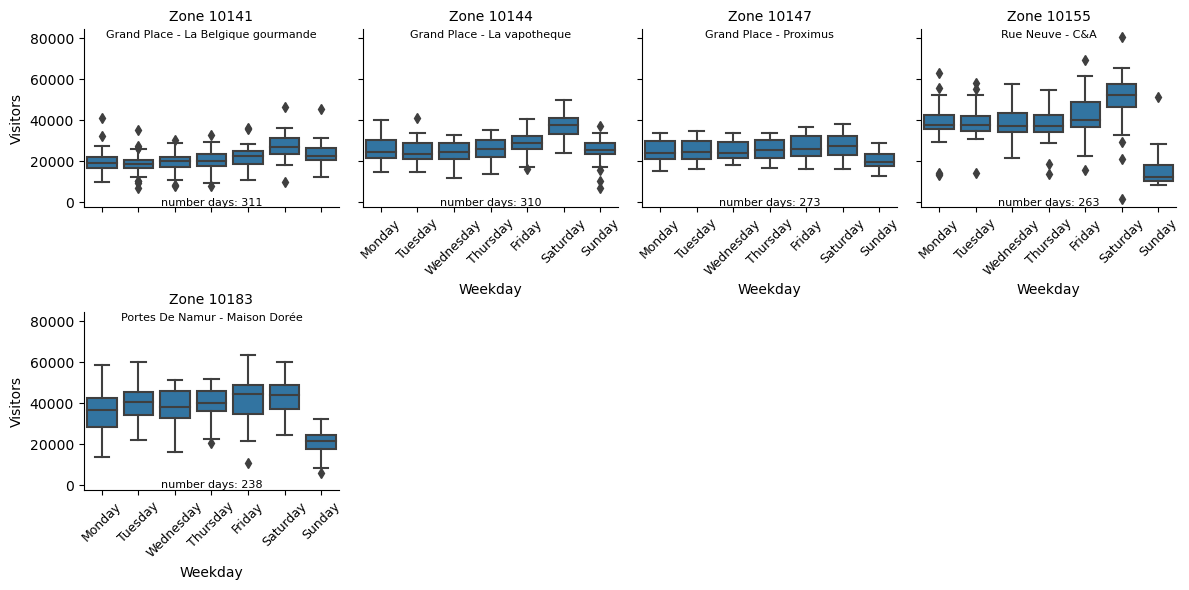

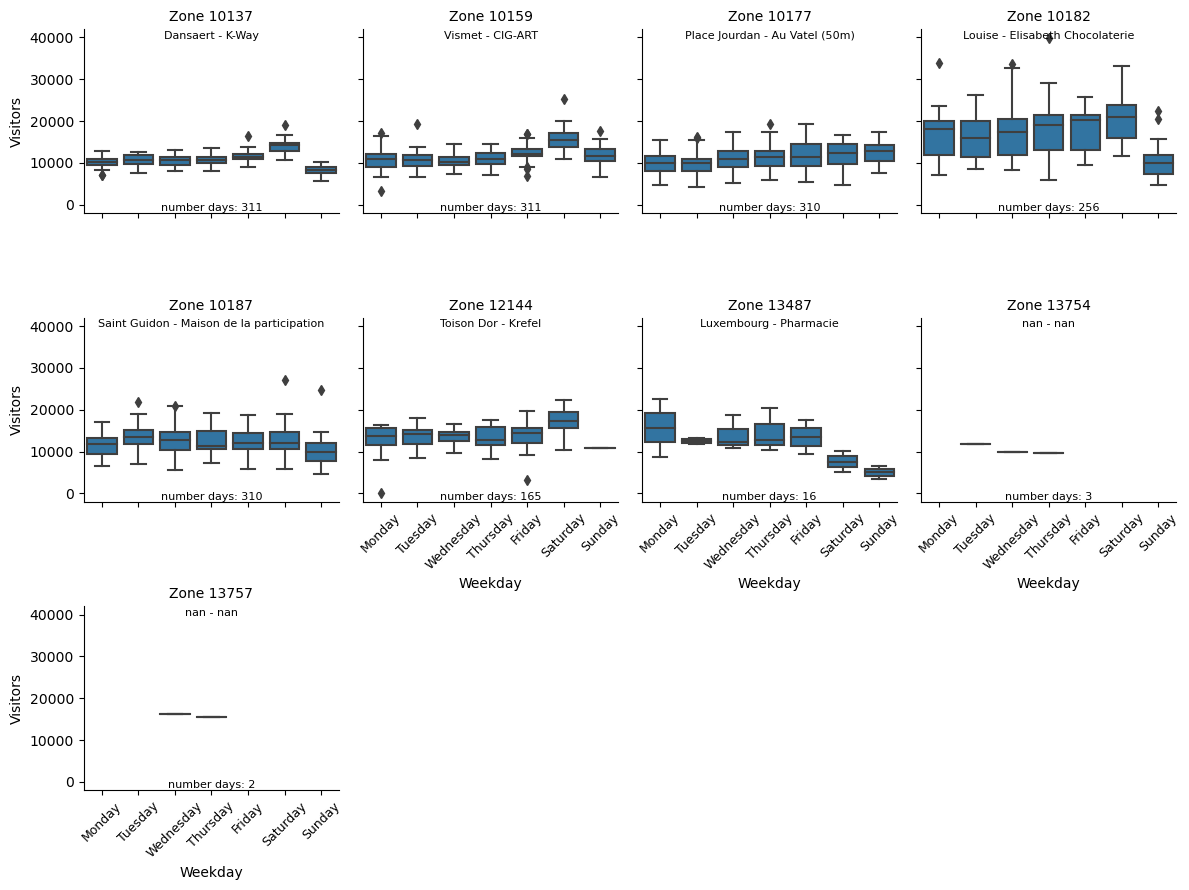

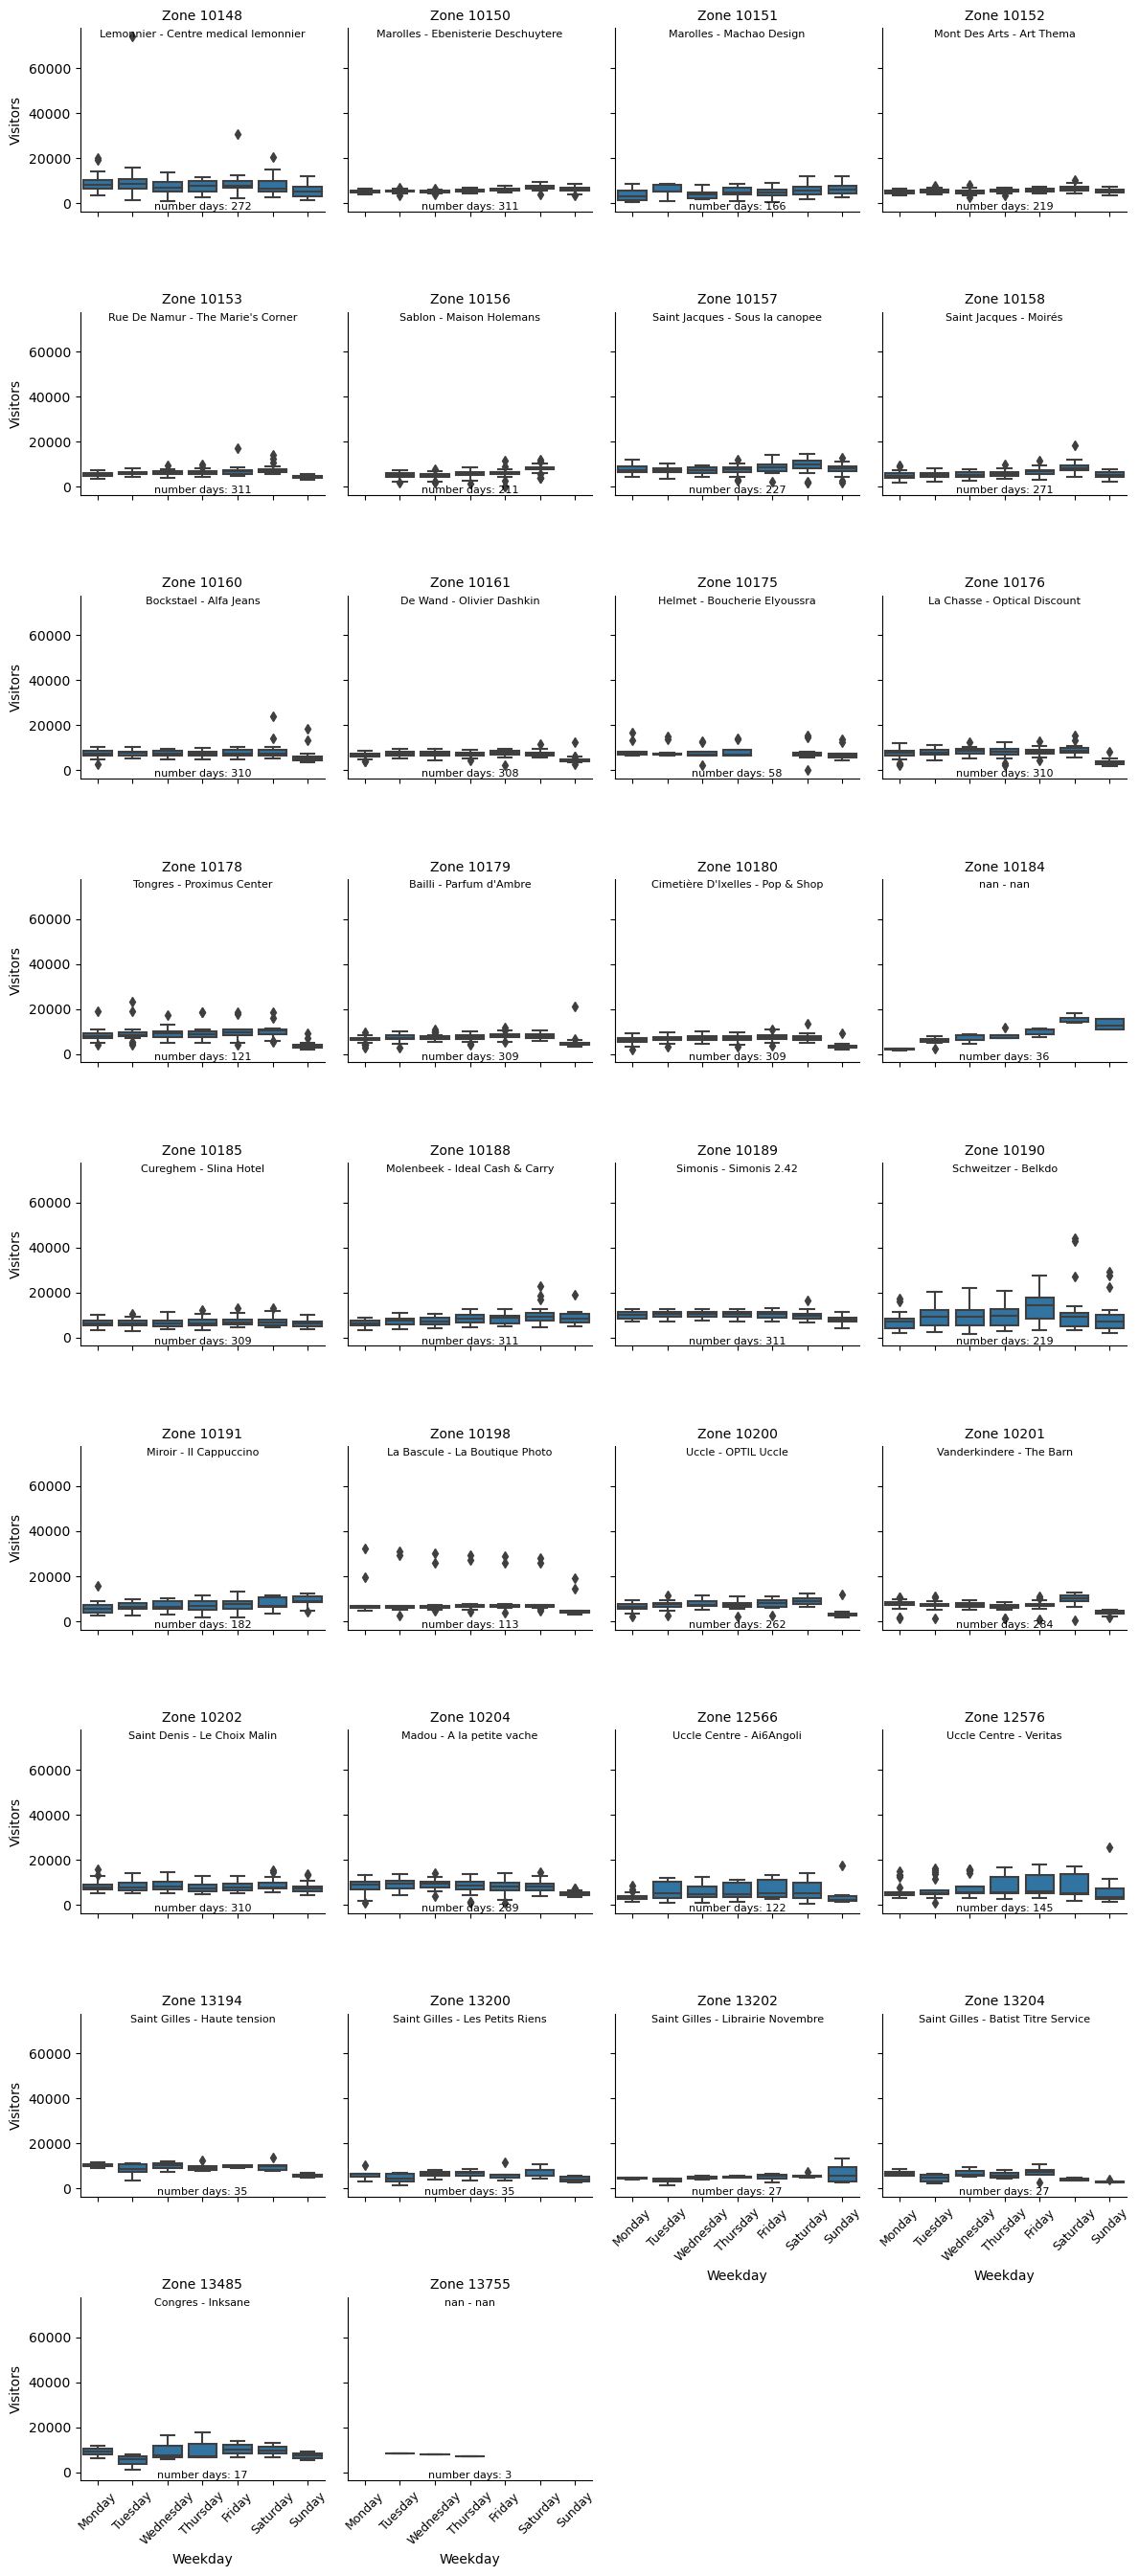

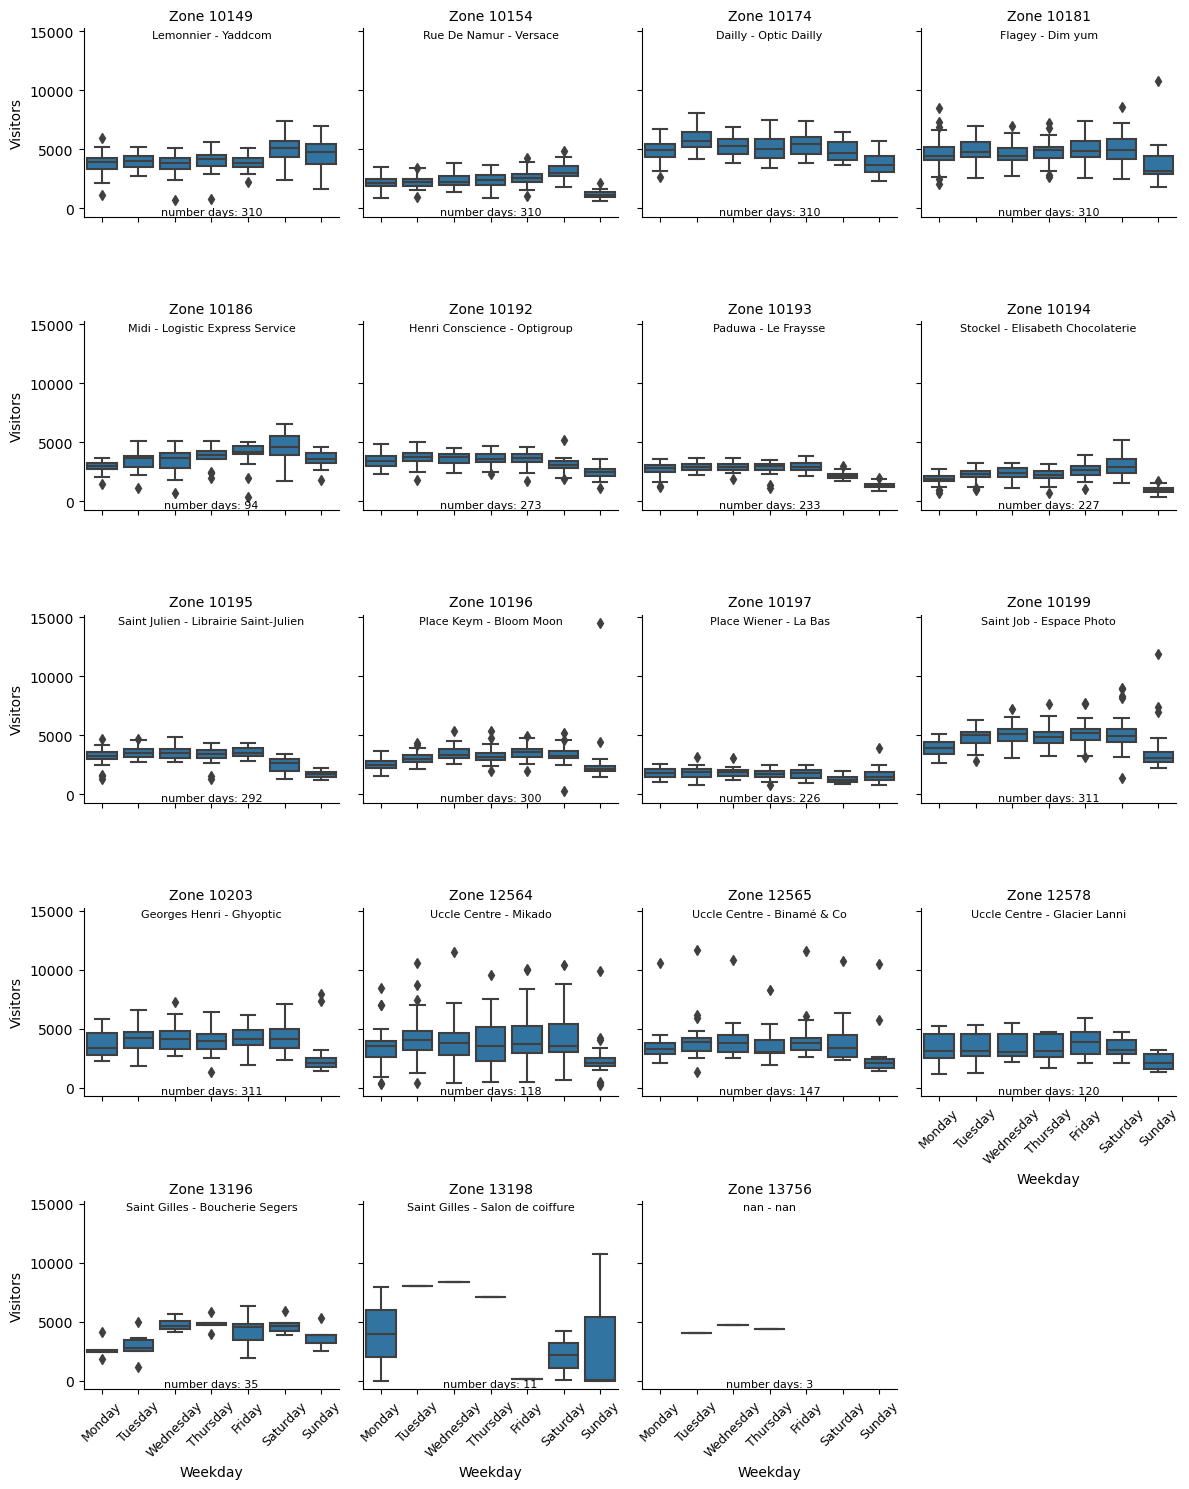

In [5]:
# Call the function
plot = display_plot((list_df))

In [12]:
## Drop Lemonnier for plotting
df.drop([10148], axis=0, inplace=True)
df.shape

(13265, 27)